In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# insample = pd.read_csv(
#     os.path.join(
#         r'2024_10_07 17-55-55 Deep Neural Network 3oosRMSE',
#         r'2024_10_07 17-55-55 Deep Neural Network 3oosRMSE insample_results.csv'
#     )
# )

# outofsample_results = pd.read_csv(
#     os.path.join(
#         r'2024_10_07 17-55-55 Deep Neural Network 3oosRMSE',
#         r'2024_10_07 17-55-55 Deep Neural Network 3oosRMSE outofsample_results.csv'
#     )
# )


##################
# training start #
##################

Mon Oct  7 23:49:08 2024


pricing settings:
Actual/365 (Fixed) day counter
New York stock exchange calendar
compounding: continuous
frequency: annual

importing dataset(s)...



loading: 100%|███████████████████████████████████████████████████████████████████████| 652/652 [00:14<00:00, 44.17it/s]



preparing data...


         spot_price  strike_price       barrier  days_to_maturity  \
count  3.123041e+06  3.123041e+06  3.123041e+06      3.123041e+06   
mean   1.452247e+03  1.451100e+03  1.451678e+03      3.310149e+02   
min    1.274240e+03  1.146816e+03  6.371200e+02      6.000000e+01   
25%    1.390450e+03  1.372317e+03  1.095068e+03      9.000000e+01   
50%    1.471490e+03  1.448576e+03  1.468389e+03      3.600000e+02   
75%    1.512520e+03  1.535957e+03  1.831593e+03      5.400000e+02   
max    1.565180e+03  1.721698e+03  2.347770e+03      7.200000e+02   
std    7.337557e+01  1.122690e+02  4.549057e+02      2.416847e+02   

       barrier_price     rebate  dividend_rate  risk_free_rate         theta  \
count   3.123041e+06  3123041.0   3.123041e+06    3.123041e+06  3.123041e+06   
mean    5.390589e+01        0.0   1.960123e-02    4.000000e-02  4.636155e-02   
min     2.593117e-08        0.0   1.779800e-02    4.000000e-02  1.992058e-02   
25%     2.075183e+00        0.0   1.8

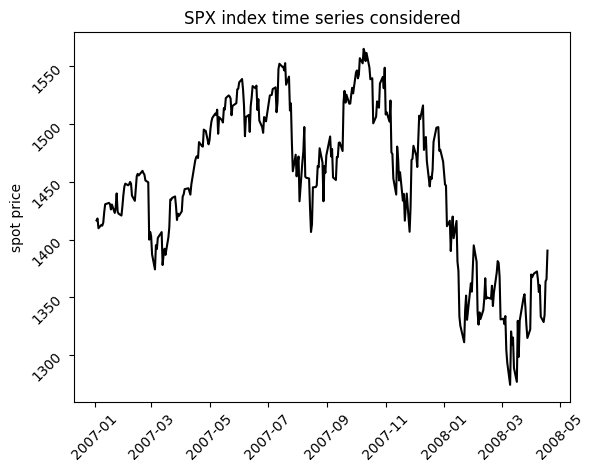

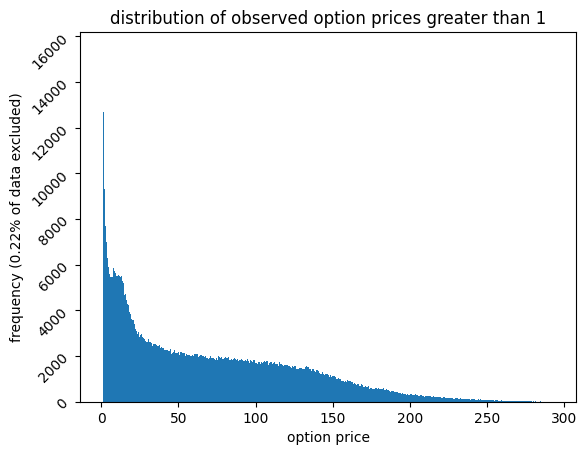

test size: 1.0%
random state: None
maximum iterations: 1000

target: 
observed_price

features: 
['spot_price', 'strike_price', 'days_to_maturity', 'risk_free_rate', 'dividend_rate', 'kappa', 'theta', 'rho', 'eta', 'v0', 'barrier', 'barrier_type_name', 'w']

feature transformer(s):
('StandardScaler', StandardScaler(), ['spot_price', 'strike_price', 'days_to_maturity', 'risk_free_rate', 'dividend_rate', 'kappa', 'theta', 'rho', 'eta', 'v0', 'barrier'])

('OneHotEncoder', OneHotEncoder(sparse_output=False), ['barrier_type_name', 'w'])

target transformer(s):
StandardScaler()

#################
# training data #
#################
         spot_price  strike_price       barrier  days_to_maturity  \
count  2.741166e+06  2.741166e+06  2.741166e+06      2.741166e+06   
mean   1.468701e+03  1.467507e+03  1.467934e+03      3.314016e+02   
min    1.311130e+03  1.180017e+03  6.555650e+02      6.000000e+01   
25%    1.438910e+03  1.390499e+03  1.100849e+03      9.000000e+01   
50%    1.480490e+03 

<Figure size 640x480 with 0 Axes>

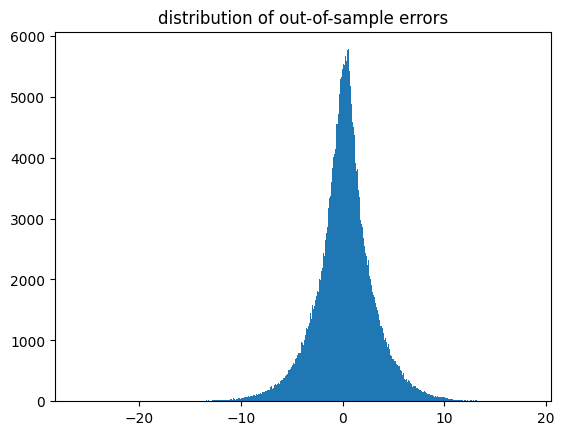

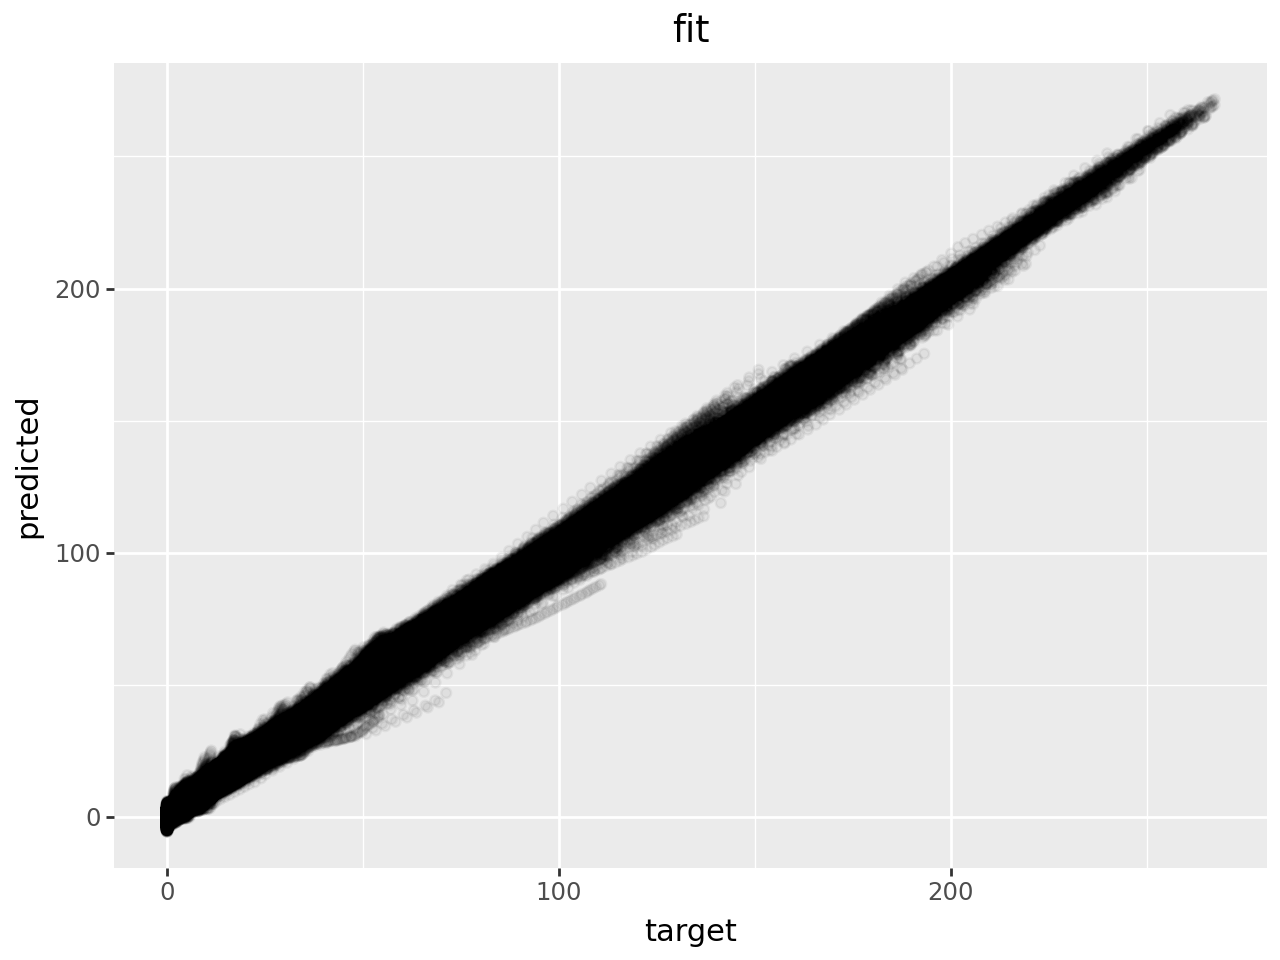

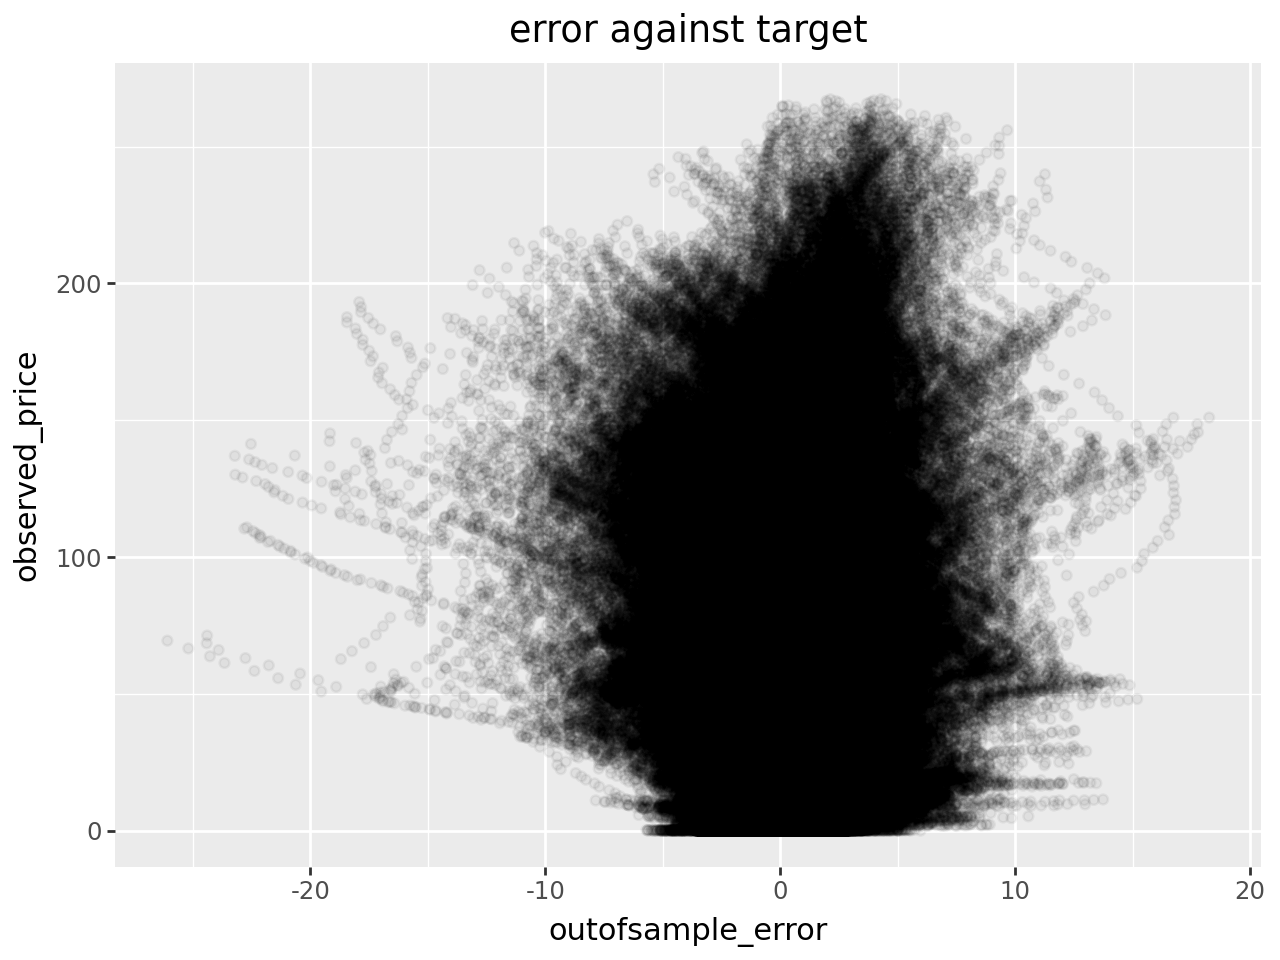

ImportError: cannot import name 'inample_results' from 'train_main' (E:\OneDrive - rsbrc\git\machine-learning-option-pricing\train_main.py)

<Figure size 640x480 with 0 Axes>

In [3]:
from train_main import model_fit, outofsample_results, inample_results

In [ ]:
maturities = outofsample_results['days_to_maturity'].unique().tolist()
barrier_type_names = outofsample_results['barrier_type_name'].unique().tolist()
oos_byt = outofsample_results.groupby(by='days_to_maturity')

RMSE = pd.DataFrame(
    np.zeros((len(maturities),len(barrier_type_names)),dtype=float),
    index = maturities,
    columns = barrier_type_names
)
for t in maturities:
    subset = oos_byt.get_group(t)
    for i in barrier_type_names:
        RMSE.loc[t,i] = np.sqrt(np.average(subset['outofsample_error'][subset['barrier_type_name']==i]**2))
print(f"\nRMSE:\n{RMSE}\n")
MAE = pd.DataFrame(
    np.zeros((len(maturities),len(barrier_type_names)),dtype=float),
    index = maturities,
    columns = barrier_type_names
)
for t in maturities:
    subset = oos_byt.get_group(t)
    for i in barrier_type_names:
        MAE.loc[t,i] = np.average(np.abs(subset['outofsample_error'][subset['barrier_type_name']==i]))
print(f"\nMAE:\n{MAE}\n")

In [ ]:
plt.figure()
plt.plot(MAE.loc[:, 'DownOut'], label='DownOut')
plt.plot(MAE.loc[:, 'DownIn'], label='DownIn')
plt.plot(MAE.loc[:, 'UpOut'], label='UpOut')
plt.plot(MAE.loc[:, 'UpIn'], label='UpIn')
plt.legend()
plt.show()
plt.close()

In [ ]:
plt.figure()
plt.hist(
    oos_byt.get_group(720)['observed_price'],
    bins=100
)
plt.show()
plt.clf()